# SGAN:

In [2]:
import pandas as pd
import numpy as np

# Importing the Dataset file

In [3]:
df = pd.read_csv("Human_vital_signs_R.csv")

In [4]:
df.head(10)

Unnamed: 0  Time (s)   HR (BPM)   RESP (BPM)   SpO2 (%)  TEMP (*C)  \
0           0         0       94.0         21.0       97.0       36.2   
1           1         1       94.0         25.0       97.0       36.2   
2           2         2      101.0         25.0       93.0       38.0   
3           3         3       55.0         11.0      100.0       35.0   
4           4         4       93.0         26.0       95.0       37.0   
5           5         5       93.0         26.0       97.0       31.0   
6           6         6       94.0         26.0       97.0       29.0   
7           7         7       94.0         26.0       97.0       29.0   
8           8         8       94.0         26.0       97.0       29.0   
9           9         9       94.0         26.0       97.0       29.0   

     OUTPUT  
0    Normal  
1    Normal  
2  Abnormal  
3  Abnormal  
4    Normal  
5    Normal  
6    Normal  
7    Normal  
8    Normal  
9    Normal

In [5]:
df.tail(10)

Unnamed: 0  Time (s)   HR (BPM)   RESP (BPM)   SpO2 (%)  TEMP (*C)  \
25483         471       471       94.0         21.0       97.0       36.2   
25484         472       472       56.0         12.0      101.0       33.0   
25485         473       473       94.0         18.0      100.0       36.0   
25486         474       474       91.0         18.0      100.0       36.0   
25487         475       475       91.0         18.0      100.0       36.0   
25488         476       476       56.0         12.0      101.0       33.0   
25489         477       477       94.0         25.0       98.0       36.4   
25490         478       478       94.0         21.0       97.0       36.2   
25491         479       479       93.0         27.0       95.0       37.0   
25492         480       480      102.0         25.0       92.0       37.0   

         OUTPUT  
25483    Normal  
25484  Abnormal  
25485  Abnormal  
25486  Abnormal  
25487  Abnormal  
25488  Abnormal  
25489    Normal  
25490    Normal  
25491    Normal  
25492  Abnormal

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25493 entries, 0 to 25492
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   25493 non-null  int64  
 1   Time (s)     25493 non-null  int64  
 2    HR (BPM)    25488 non-null  float64
 3    RESP (BPM)  25346 non-null  float64
 4    SpO2 (%)    25366 non-null  float64
 5   TEMP (*C)    25493 non-null  float64
 6   OUTPUT       25493 non-null  object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.4+ MB


# Removing the Null and Zero values from dataset

In [7]:
if df.isnull().values.any():
    print("There are null values in the DataFrame.")
else:
    print("No null values in the DataFrame.")

There are null values in the DataFrame.


In [8]:
print(df.columns.tolist())

['Unnamed: 0', 'Time (s)', ' HR (BPM)', ' RESP (BPM)', ' SpO2 (%)', 'TEMP (*C)', 'OUTPUT']


In [9]:
null_counts = df.isnull().sum()
print(null_counts)

Unnamed: 0       0
Time (s)         0
 HR (BPM)        5
 RESP (BPM)    147
 SpO2 (%)      127
TEMP (*C)        0
OUTPUT           0
dtype: int64


In [10]:
null_or_zero_indices = (df.isnull() | (df == 0)).stack()  # Combine conditions
null_or_zero_indices = null_or_zero_indices[null_or_zero_indices].index.tolist()

print("Null or zero values found at:")
for row, col in null_or_zero_indices:
    print(f"Row: {row}, Column: {col}")


Null or zero values found at:
Row: 0, Column: Unnamed: 0
Row: 0, Column: Time (s)
Row: 111, Column:  SpO2 (%)
Row: 112, Column:  SpO2 (%)
Row: 113, Column:  SpO2 (%)
Row: 114, Column:  SpO2 (%)
Row: 115, Column:  SpO2 (%)
Row: 116, Column:  SpO2 (%)
Row: 117, Column:  SpO2 (%)
Row: 118, Column:  SpO2 (%)
Row: 119, Column:  SpO2 (%)
Row: 120, Column:  SpO2 (%)
Row: 121, Column:  SpO2 (%)
Row: 122, Column:  SpO2 (%)
Row: 123, Column:  SpO2 (%)
Row: 481, Column: Unnamed: 0
Row: 481, Column: Time (s)
Row: 962, Column: Unnamed: 0
Row: 962, Column: Time (s)
Row: 1443, Column: Unnamed: 0
Row: 1443, Column: Time (s)
Row: 1924, Column: Unnamed: 0
Row: 1924, Column: Time (s)
Row: 2063, Column:  SpO2 (%)
Row: 2064, Column:  SpO2 (%)
Row: 2065, Column:  SpO2 (%)
Row: 2066, Column:  SpO2 (%)
Row: 2067, Column:  SpO2 (%)
Row: 2068, Column:  SpO2 (%)
Row: 2405, Column: Unnamed: 0
Row: 2405, Column: Time (s)
Row: 2886, Column: Unnamed: 0
Row: 2886, Column: Time (s)
Row: 3367, Column: Unnamed: 0
Row: 3

In [11]:
df['Unnamed: 0'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [12]:
df.dropna(axis=0, inplace=True)

In [13]:
null_counts = df.isnull().sum()
print(null_counts)
zero_counts = (df == 0).sum()
print(zero_counts)

Unnamed: 0     0
Time (s)       0
 HR (BPM)      0
 RESP (BPM)    0
 SpO2 (%)      0
TEMP (*C)      0
OUTPUT         0
dtype: int64
Unnamed: 0      52
Time (s)        52
 HR (BPM)        0
 RESP (BPM)    219
 SpO2 (%)        0
TEMP (*C)        0
OUTPUT           0
dtype: int64


In [14]:
df = df[df[' RESP (BPM)'] != 0]

In [15]:
null_counts = df.isnull().sum()
print(null_counts)
zero_counts = (df == 0).sum()
print(zero_counts)

Unnamed: 0     0
Time (s)       0
 HR (BPM)      0
 RESP (BPM)    0
 SpO2 (%)      0
TEMP (*C)      0
OUTPUT         0
dtype: int64
Unnamed: 0     52
Time (s)       52
 HR (BPM)       0
 RESP (BPM)     0
 SpO2 (%)       0
TEMP (*C)       0
OUTPUT          0
dtype: int64


# Assigning 'NORMAL' = 0 and 'ABNORMAL' = 1

In [16]:
df['OUTPUT'] = df['OUTPUT'].str.strip().str.lower().replace({'normal': 0, 'abnormal': 1})

/var/folders/p2/6mgfcw956d17xkqh172sdjk40000gn/T/ipykernel_26395/670248896.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['OUTPUT'] = df['OUTPUT'].str.strip().str.lower().replace({'normal': 0, 'abnormal': 1})


In [17]:
df.head(10)

Unnamed: 0  Time (s)   HR (BPM)   RESP (BPM)   SpO2 (%)  TEMP (*C)  OUTPUT
0           0         0       94.0         21.0       97.0       36.2       0
1           1         1       94.0         25.0       97.0       36.2       0
2           2         2      101.0         25.0       93.0       38.0       1
3           3         3       55.0         11.0      100.0       35.0       1
4           4         4       93.0         26.0       95.0       37.0       0
5           5         5       93.0         26.0       97.0       31.0       0
6           6         6       94.0         26.0       97.0       29.0       0
7           7         7       94.0         26.0       97.0       29.0       0
8           8         8       94.0         26.0       97.0       29.0       0
9           9         9       94.0         26.0       97.0       29.0       0

# Exploratory Data Analysis

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("Set2")

plt.figure(figsize=(14, 10), dpi = 1024)

for i, column in enumerate([' HR (BPM)', ' RESP (BPM)', ' SpO2 (%)', 'TEMP (*C)']):
    plt.subplot(2, 2, i + 1)
    
    sns.histplot(df[column], bins=30, kde=True, color=sns.color_palette("husl", 8)[i])
   
    plt.title(f'Distribution of {column.strip()}', fontsize=14, fontweight='bold', color='darkblue')
    plt.xlabel(column.strip(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()

<Figure size 2100x1500 with 0 Axes>

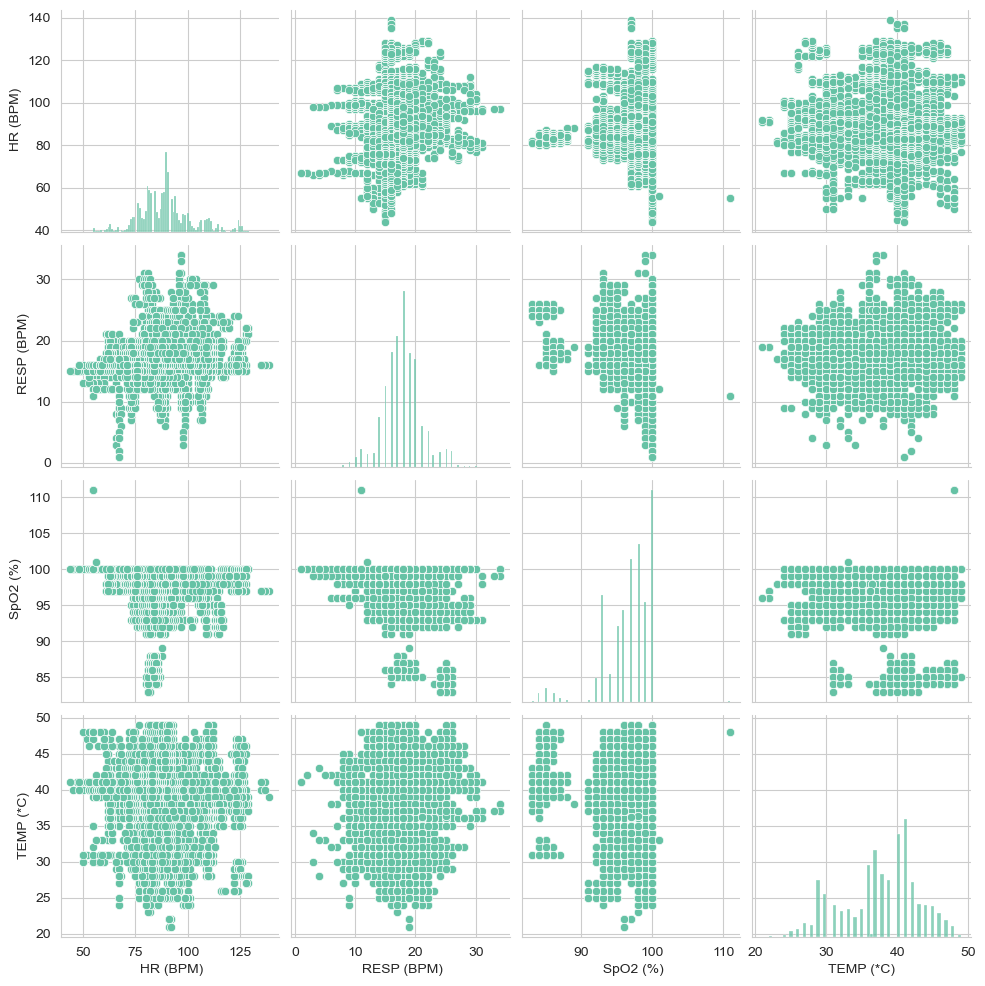

In [33]:
plt.figure(figsize=(14, 10), dpi = 150)  

sns.pairplot(df[[' HR (BPM)', ' RESP (BPM)', ' SpO2 (%)', 'TEMP (*C)']])

plt.show()

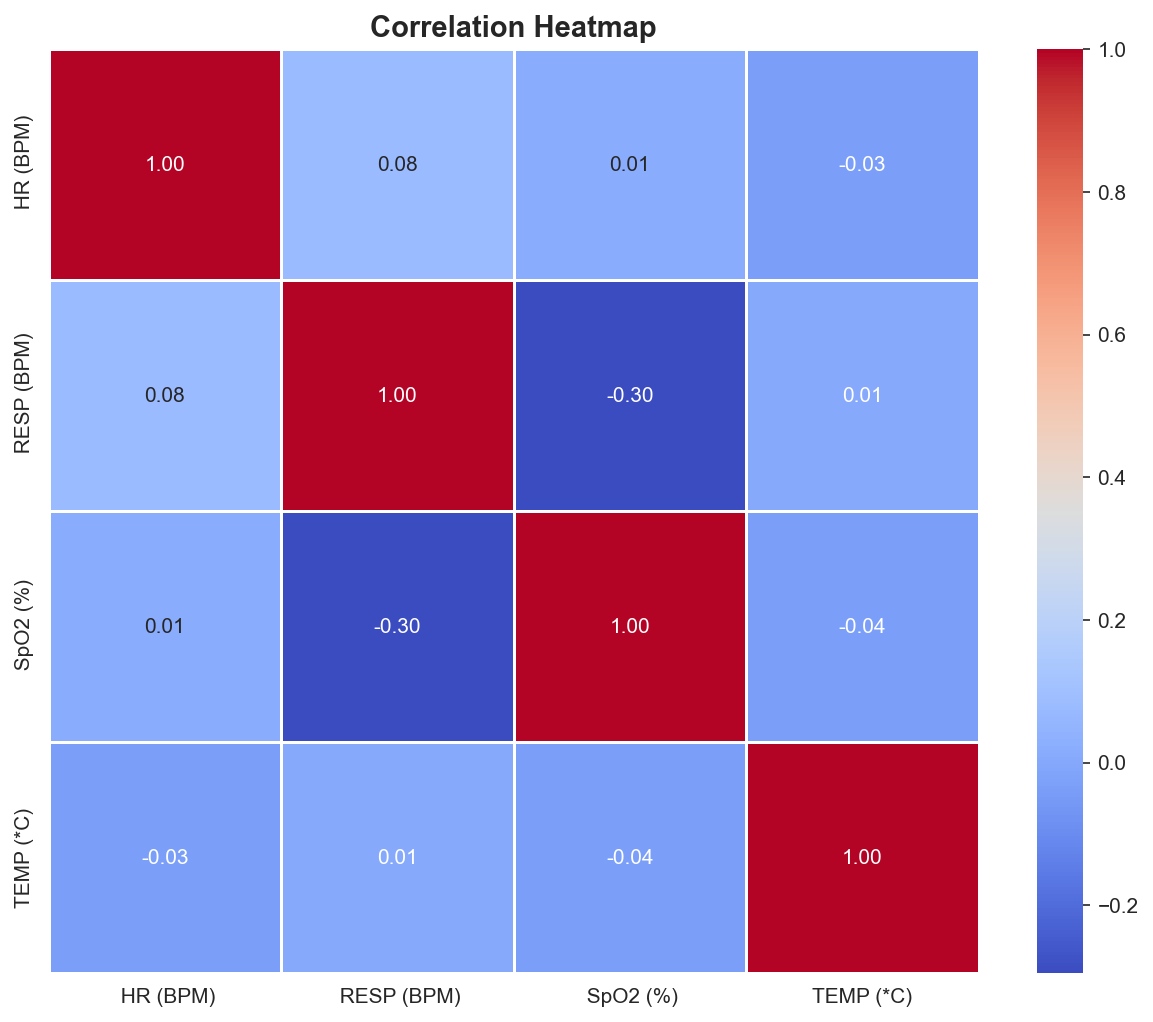

In [40]:
plt.figure(figsize=(10, 8), dpi= 150)
corr = df[[' HR (BPM)', ' RESP (BPM)', ' SpO2 (%)', 'TEMP (*C)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()


In [44]:
plt.figure(figsize=(14, 10),dpi= 720)
for i, column in enumerate([' HR (BPM)', ' RESP (BPM)', ' SpO2 (%)', 'TEMP (*C)']):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x=df[column], color=sns.color_palette("husl", 8)[i])
    plt.title(f'Violin Plot of {column.strip()}', fontsize=14, fontweight='bold', color='darkblue')
    plt.xlabel(column.strip(), fontsize=12)
plt.tight_layout()
plt.show()


/var/folders/p2/6mgfcw956d17xkqh172sdjk40000gn/T/ipykernel_26395/1127130514.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='OUTPUT', data=df, palette="Set2")


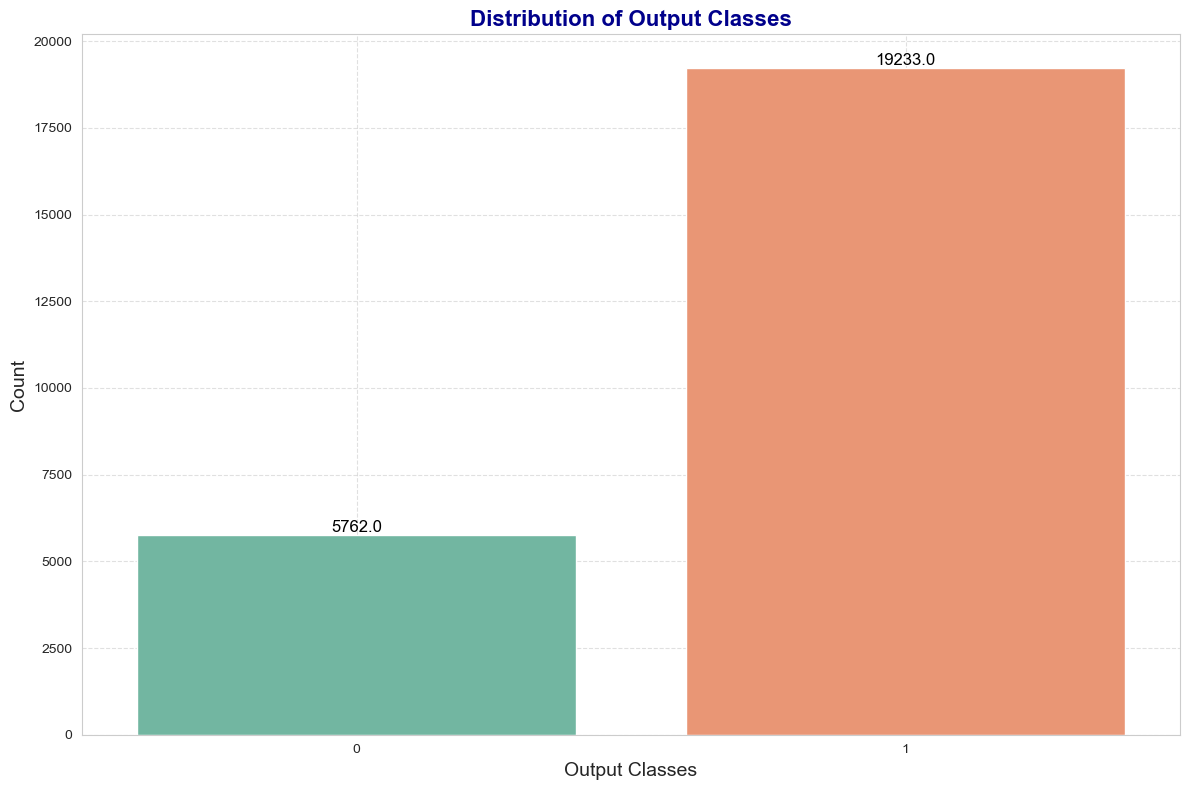

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")  
sns.set_palette("pastel") 

plt.figure(figsize=(12, 8), dpi=100)

ax = sns.countplot(x='OUTPUT', data=df, palette="Set2")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title("Distribution of Output Classes", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Output Classes', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()  
plt.show()

In [46]:
df

Unnamed: 0  Time (s)   HR (BPM)   RESP (BPM)   SpO2 (%)  TEMP (*C)  \
0               0         0       94.0         21.0       97.0       36.2   
1               1         1       94.0         25.0       97.0       36.2   
2               2         2      101.0         25.0       93.0       38.0   
3               3         3       55.0         11.0      100.0       35.0   
4               4         4       93.0         26.0       95.0       37.0   
...           ...       ...        ...          ...        ...        ...   
25488         476       476       56.0         12.0      101.0       33.0   
25489         477       477       94.0         25.0       98.0       36.4   
25490         478       478       94.0         21.0       97.0       36.2   
25491         479       479       93.0         27.0       95.0       37.0   
25492         480       480      102.0         25.0       92.0       37.0   

       OUTPUT  
0           0  
1           0  
2           1  
3           1  
4           0  
...       ...  
25488       1  
25489       0  
25490       0  
25491       0  
25492       1  

[24995 rows x 7 columns]

# Unnamed and time not needed, so removing

In [47]:
df.drop(columns=['Unnamed: 0', 'Time (s)'],inplace=True)

In [48]:
df.head(10)

HR (BPM)   RESP (BPM)   SpO2 (%)  TEMP (*C)  OUTPUT
0       94.0         21.0       97.0       36.2       0
1       94.0         25.0       97.0       36.2       0
2      101.0         25.0       93.0       38.0       1
3       55.0         11.0      100.0       35.0       1
4       93.0         26.0       95.0       37.0       0
5       93.0         26.0       97.0       31.0       0
6       94.0         26.0       97.0       29.0       0
7       94.0         26.0       97.0       29.0       0
8       94.0         26.0       97.0       29.0       0
9       94.0         26.0       97.0       29.0       0